## How are in demand skills trending for Data Analysts role?

Methodology

1. Aggregate skill count monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill trend

In [1]:
# import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import ast 
import numpy as np
from datasets import load_dataset
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']  = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\soods\anaconda3\envs\Job_Market_Analysis_DataProfile_2023-24_python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Group the Skills by Month

Select only those job postings that are for Data Analysts and the job country is the United States. 

In [2]:
df_us_da = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_us_da.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
721474,Data Analyst,Data Analyst,"Tucker, GA",via BeBee,Full-time,False,Georgia,2023-06-08 21:46:33,True,False,United States,None,NaN,NaN,Experis,[power bi],{'analyst_tools': ['power bi']}
23172,Data Analyst,Data Analyst,"Dallas, TX",via Trabajo.org,Full-time,False,"Texas, United States",2023-05-06 13:01:23,False,False,United States,None,NaN,NaN,Caliber Sourcing,"[t-sql, r, python, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
742700,Data Analyst,Data Analyst,"Atlanta, GA",via LinkedIn,Contractor,False,Georgia,2023-06-21 20:52:35,False,False,United States,None,NaN,NaN,Apex Systems,"[sql, mysql, snowflake, tableau, power bi, jira]","{'analyst_tools': ['tableau', 'power bi'], 'as..."
396345,Data Analyst,Data Analyst,"Jersey City, NJ",via SonicJobs,Full-time,False,"New York, United States",2023-02-06 17:59:54,True,False,United States,None,NaN,NaN,BCforward,"[sql, word]","{'analyst_tools': ['word'], 'programming': ['s..."
617173,Data Analyst,Data Analyst,Anywhere,via Get.It,Full-time,True,"New York, United States",2023-12-29 11:59:56,False,True,United States,year,84000.0,NaN,Get It Recruit - Information Technology,"[sql, javascript, sas, sas, excel, spss, table...","{'analyst_tools': ['sas', 'excel', 'spss', 'ta..."


Then extract the month from each job's posting date to see when jobs are listed. 

In [3]:
df_us_da['job_posted_month'] = df_us_da['job_posted_date'].dt.strftime('%b') # -------------> Extracting Month from date_posted column
df_us_da['job_posted_month_no'] = df_us_da['job_posted_date'].dt.month

Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [4]:
df_us_da_explode = df_us_da.explode('job_skills') 

## Pivot Plotting

Create a pivot table from the df_US_da_explode, setting 'month' as the index, job_skills as the columns, and fills missing entries with zero.

In [5]:
df_us_da_pivot = df_us_da_explode.pivot_table(columns='job_skills',index=['job_posted_month', 'job_posted_month_no'],aggfunc='size', fill_value=0).sort_index(level=1)
df_us_da_pivot = df_us_da_pivot.droplevel(1)

It adds a new row labeled Total that sums up counts across all months for each skill. 

In [6]:
df_us_da_pivot.loc['total'] =df_us_da_pivot.sum() #------------------> adding a new row in our pivot table to calculate column total
df_us_da_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
Feb,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
Mar,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
Apr,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
May,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
Jun,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
Jul,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
Aug,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
Sep,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table.

In [7]:
sorted_column = df_us_da_pivot.loc['total'].sort_values(ascending= False).index 
df_us_da_pivot = df_us_da_pivot[sorted_column] # -----------------> Sorting columns based on the values in the 'total' row
df_us_da_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
Feb,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
Mar,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
Apr,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
May,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
Jun,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
Jul,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
Aug,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
Sep,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


Removing total row from the dataset and extracting only top 6 columns to be plotted on the chart

In [8]:
df_us_da_pivot.drop('total', inplace= True)
df_us_da_pivot_final = df_us_da_pivot.iloc[:,:6].copy()
df_us_da_pivot_final

C:\Users\soods\AppData\Local\Temp\ipykernel_20332\161953356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_da_pivot.drop('total', inplace= True)


job_skills,sql,excel,tableau,python,power bi,sas
job_posted_month,,,,,,
Jan,1138,781,646,529,326,394
Feb,782,544,408,378,302,270
Mar,802,580,463,400,277,300
Apr,845,577,462,421,292,258
May,706,490,367,336,251,206
Jun,742,491,395,396,272,202
Jul,560,431,296,292,190,182
Aug,784,641,480,460,292,272
Sep,485,336,277,253,183,150


Plot the Monthly Skill Counts

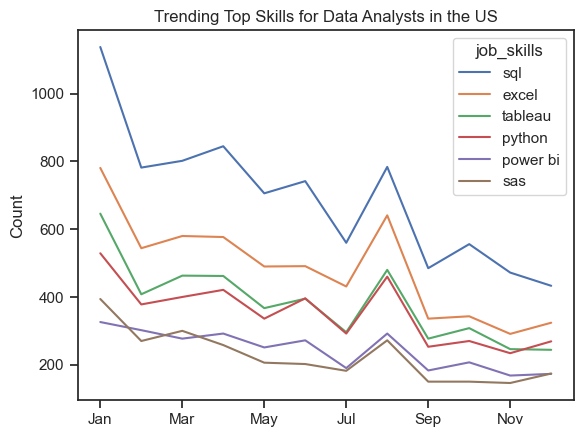

In [14]:
df_us_da_pivot_final.plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

This is good but totals can be misleading without context. Percentages gives a more accurate comparison.

## Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in df_us_dA by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in da_total_posting. This is needed to compute the percentages.

In [10]:
da_total_posting = df_us_da.groupby('job_posted_month').size().reset_index(name = 'count') # -------------> total job posting in each month
da_total_posting

,job_posted_month,count
0,Apr,1369
1,Aug,1414
2,Dec,817
3,Feb,1284
4,Jan,1816
5,Jul,955
6,Jun,1207
7,Mar,1362
8,May,1156
9,Nov,848


This code merges da_total_postig with df_us_da_pivot_final to have corresponding job posting mothwise which can then be divided with individual skill count for that month to get percentage value

In [11]:
df_merge = pd.merge(left =df_us_da_pivot_final , right= da_total_posting , how= 'left' , on= 'job_posted_month' )
df_merge = df_merge.set_index('job_posted_month')
df_merge

,sql,excel,tableau,python,power bi,sas,count
job_posted_month,,,,,,,
Jan,1138,781,646,529,326,394,1816
Feb,782,544,408,378,302,270,1284
Mar,802,580,463,400,277,300,1362
Apr,845,577,462,421,292,258,1369
May,706,490,367,336,251,206,1156
Jun,742,491,395,396,272,202,1207
Jul,560,431,296,292,190,182,955
Aug,784,641,480,460,292,272,1414
Sep,485,336,277,253,183,150,856


The new DataFrame, df_perc, shows skill distributions as percentages of total monthly job entries.

In [12]:
df_perc = round(df_merge.iloc[ : , : -1].div(df_merge['count'], axis= 0) * 100,3) #-----------> dividing each value in a row with corresponding count value 
df_perc 

,sql,excel,tableau,python,power bi,sas
job_posted_month,,,,,,
Jan,62.665,43.007,35.573,29.130,17.952,21.696
Feb,60.903,42.368,31.776,29.439,23.520,21.028
Mar,58.884,42.584,33.994,29.369,20.338,22.026
Apr,61.724,42.148,33.747,30.752,21.329,18.846
May,61.073,42.388,31.747,29.066,21.713,17.820
Jun,61.475,40.679,32.726,32.809,22.535,16.736
Jul,58.639,45.131,30.995,30.576,19.895,19.058
Aug,55.446,45.332,33.946,32.532,20.651,19.236
Sep,56.659,39.252,32.360,29.556,21.379,17.523


## Plot Monthly Skill Demand

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month.

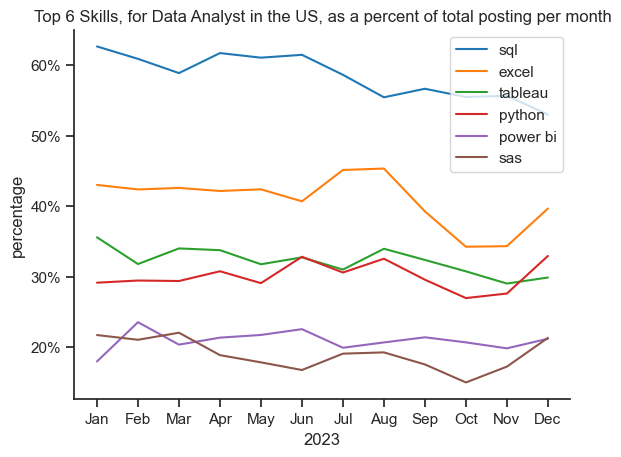

In [13]:
sns.set_theme(style='ticks')
sns.lineplot(data= df_perc, dashes= False, palette= 'tab10')
plt.title('Top 6 Skills, for Data Analyst in the US, as a percent of total posting per month')
plt.ylabel('percentage')
plt.xlabel(2023)
sns.despine()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x , _ : f'{int(x)}%' ))
plt.show()